In [21]:
#pandas/seaborn
import pandas as pd 
import seaborn as sns

In [22]:
#Df
dfcalificaciones = pd.read_csv ('calificaciones.csv')
dfcarrera = pd.read_csv ('carrera.csv')
dfescuelas = pd.read_csv ('escuelas.csv')
dfestudiantes= pd.read_csv ('estudiantes.csv')

In [23]:
#Calificaciones
dfcalificaciones.head()

,periodo,clave_alumno,clave_materia,calificacion,tipo_calificacion
0,2001,0,ACB9309,100.0,1
1,2001,0,ACH9322,75.0,1
2,2001,0,ACM9313,0.0,3
3,2001,0,ACM9301,0.0,3
4,2001,0,ACC9326,93.0,1


In [24]:
#Carrera
dfcarrera.head()

,clave_carrera,nombre,corto
0,0,INGENIERIA INDUSTRIAL,Industrial
1,1,INGENIERIA BIOQUIMICA,Bioquimica
2,2,INGENIERIA MECANICA,Mecanica
3,3,INGENIERIA ELECTRICA,Electrica
4,4,INGENIERIA ELECTRONICA,Electronica


In [25]:
#Escuelas
dfescuelas.head()

,clave,escuela
0,3,COBAES 3(PROFRA. VELINA LEON )
1,4,COBAES 4(PROFR. VICTOR M. RUB)
2,5,COBAES 5(PROFRA. FCA. GUERRER)
3,6,COBAES 6(ING.JOSE HERNANDEZ T)
4,7,COBAES 7(GRAÑ. PABLO MACIAS V)


In [26]:
#Alumnos
dfestudiantes.head()

,clave_alumno,clave_carrera,sexo,prepa,colonia,municipio,ciudad,ingreso,termino,causa_salida
0,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5
1,248,4,1,125,FRAC.RINCON HYA,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5
2,260,4,1,71,El Walamo,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5
3,261,4,1,107,4 de Marzo,25006.0,"CULIACAN, SIN.",2003.0,2051.0,4
4,262,4,2,2,Los Angeles,25006.0,CULIACAN,2003.0,2053.0,5


Promedio por Sexo por Carrera

In [40]:
#Union de calificaciones con estudiantes
df=dfcalificaciones.merge(dfestudiantes, on='clave_alumno')

In [28]:
#Carreras
df=df.merge(dfcarrera, on='clave_carrera')

In [41]:
#Calificaciones validas
dfCalfValidas=df[df['tipo_calificacion']==1]

In [30]:
#Carrera, sexo y promedio
promedio=dfCalfValidas.groupby(['corto','sexo'])['calificacion'].mean().reset_index()

In [31]:
#Tabla promedios
promedio.columns=['Carrera', 'Sexo', 'Promedio']

In [32]:
#Mapear sexo o texto
promedio['Sexo'] = promedio['Sexo'].map({1: 'Hombre', 2: 'Mujer'})

In [33]:
#Imprimir tabla promedios
print(promedio)

        Carrera    Sexo   Promedio
0    Bioquimica  Hombre  87.182523
1    Bioquimica   Mujer  89.892341
2     Electrica  Hombre  83.953852
3     Electrica   Mujer  87.233400
4   Electronica  Hombre  85.686848
5   Electronica   Mujer  88.465534
6    Industrial  Hombre  87.718999
7    Industrial   Mujer  91.493934
8   Informatica  Hombre  86.247141
9   Informatica   Mujer  88.916365
10     Mecanica  Hombre  85.058768
11     Mecanica   Mujer  88.732782
12  Mecatronica  Hombre  87.472334
13  Mecatronica   Mujer  90.692740
14     Sistemas  Hombre  85.275790
15     Sistemas   Mujer  88.359288
16          TIC  Hombre  77.994152
17          TIC   Mujer  81.883117


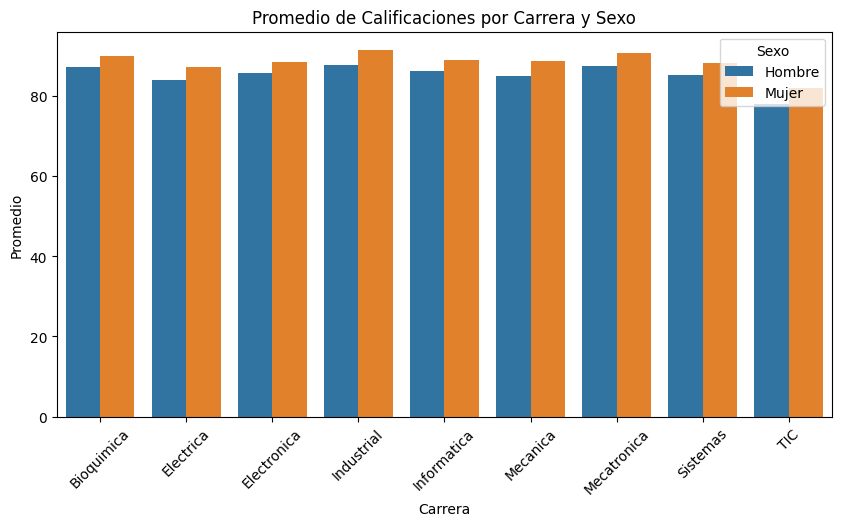

In [34]:
# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(data=promedio, x='Carrera', y='Promedio', hue='Sexo')
plt.title('Promedio de Calificaciones por Carrera y Sexo')
plt.xticks(rotation=45)
plt.show()

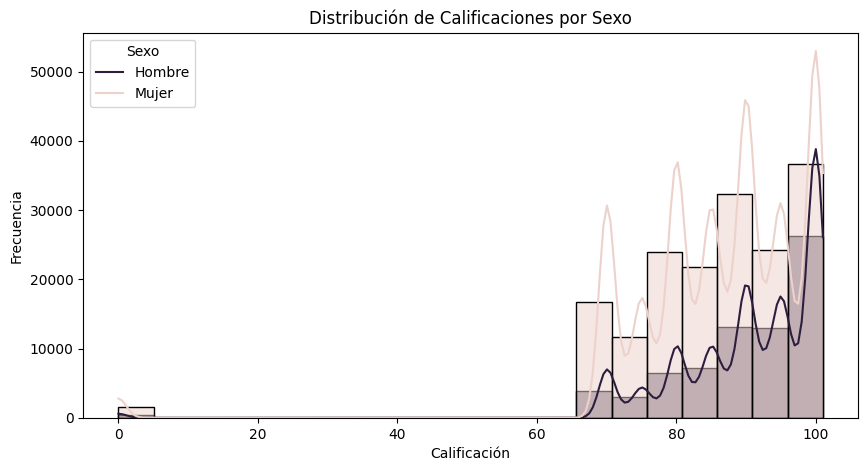

In [35]:
# Gráfico de distribución
plt.figure(figsize=(10, 5))
sns.histplot(data=dfCalfValidas, x='calificacion', hue='sexo', kde=True, bins=20)
plt.title('Distribución de Calificaciones por Sexo')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.legend(title='Sexo', labels=['Hombre', 'Mujer'])
plt.show()

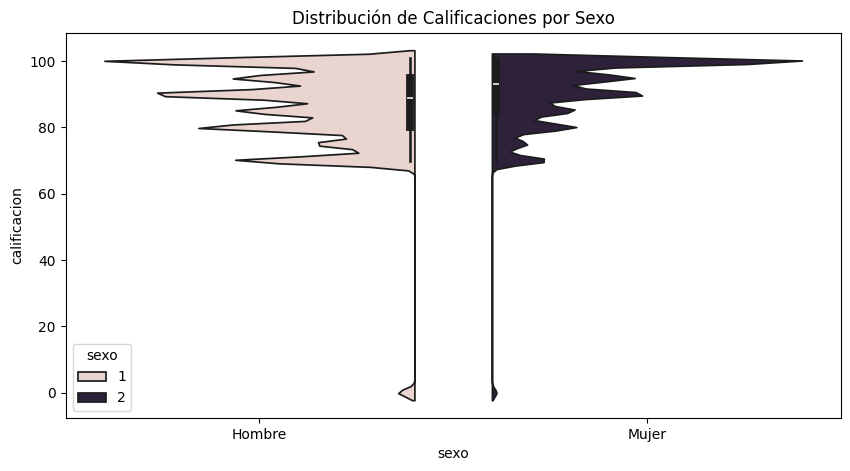

In [36]:
# Gráfico de violín
plt.figure(figsize=(10, 5))
sns.violinplot(data=dfCalfValidas, x='sexo', y='calificacion', hue='sexo', split=True)
plt.title('Distribución de Calificaciones por Sexo')
plt.xticks([0, 1], ['Hombre', 'Mujer'])  # Mapear valores de sexo
plt.show()

# Cambio de promedios por semestre por carrera 
- gràfica de lineas
- promedio por carreras

In [42]:
df=dfcarrera.merge(promedio, on='Promedio')


KeyError: 'Promedio'

# Poblacion estudiantil por año por cohorte
- cuantas personas hay por semestre en comparacion con cuantas hay en el semestre anterior. 
- cuantas tienen materias cargdas que enrtaron en comparacion con otros semestres.
- primero  hacer tabla
- por porcentaje o cantidad de personas